In [2]:
# root_dir = "/media/enc/vera1/sebastian/codes/ARF_STUFF/results/exp1.csv"
root_dir = "/home/sebastian/codes/ARF_STUFF/arf_paper/outputs/Exp2_REAL/exp2/exp2.csv"
exp_name = "exp2"

In [3]:
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

In [4]:
if exp_name == "exp1":
    model_info = {
        'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
        'Random Forest': {'color': "tomato", 'marker': "s"},
        'Linear Regression': {'color': "gold", 'marker': "^"},
        'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
        'Decision Tree Regressor': {'color': "lightcoral", 'marker': "p"},
        'MLP Regressor': {'color': "mediumorchid", 'marker': "X"},
        'Random Forest Regressor': {'color': "skyblue", 'marker': "o"},
        'Passive Aggressive Regressor': {'color': "lightpink", 'marker': "s"},
        'K-Neighbors Regressor': {'color': "deepskyblue", 'marker': "^"},
        'SVR': {'color': "limegreen", 'marker': "+"},
        'Linear Regression (LR)': {'color': "salmon", 'marker': "P"},
        'LSTM with Attention': {'color': "orchid", 'marker': "*"},
        'GRU': {'color': "slateblue", 'marker': "v"},
        'BI-LSTM': {'color': "darkorange", 'marker': "d"},
        'LSTM': {'color': "lightseagreen", 'marker': "*"},
        'SGD Regressor': {'color': "violet", 'marker': "h"}
    }
else:
    model_info = {
    'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
    'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
    'Passive Aggressive (PA)': {'color': "lightpink", 'marker': "s"},
    'SGD Regressor': {'color': "violet", 'marker': "h"},
    'Adaptive Random Forest (ARF)': {'color': "tomato", 'marker': "s"},
    'Hoeffding Adaptive Tree Regressor': {'color': "gold", 'marker': "^"},
    'Hoeffding Tree Regressor': {'color': "skyblue", 'marker': "o"},
    'SRP Regressor': {'color': "deepskyblue", 'marker': "^"},
    'MLP partialfit': {'color': "mediumorchid", 'marker': "X"}
    }


In [5]:
df = pd.read_csv(root_dir,index_col=False)
df

,Model,Window Size,MAE_mean,MAE_std,SMAPE_mean,SMAPE_std,r2_mean,r2_std,MASE_mean,MASE_std,Training_time,Inference_time,Model memory (MB)
0,AdaptiveRandomForest_ws_12,12,2.594,0.238,7.772,0.327,16.594,1.104,0.933,0.006,0.670,0.061,930.893
1,AdaptiveRandomForest_ws_20,20,2.114,0.413,7.172,0.532,14.006,2.159,0.943,0.009,0.546,0.107,1267.728
2,AdaptiveRandomForest_ws_32,32,1.760,0.515,6.658,0.721,12.232,2.774,0.951,0.011,0.454,0.133,2363.090
3,AdaptiveRandomForest_ws_6,6,3.167,0.076,8.475,0.160,19.294,0.279,0.921,0.003,0.818,0.020,36765.313
4,AdaptiveRandomForest_ws_64,64,1.276,0.675,5.092,1.411,9.951,3.479,0.969,0.017,0.330,0.174,5991.680
5,AdaptiveRandomForest_ws_8,8,2.917,0.143,8.176,0.218,18.198,0.634,0.926,0.004,0.754,0.037,10985.082
6,AdaptiveRandomForest_ws_9,9,2.841,0.240,8.271,0.325,17.102,1.128,0.924,0.006,0.734,0.062,1403.575
7,HoeffdingAdaptiveTreeRegressor_ws_12,12,3.926,0.578,23.424,53.968,22.355,0.460,-2.661,15.327,1.014,0.149,604.247
8,HoeffdingAdaptiveTreeRegressor_ws_20,20,3.936,0.143,11.462,8.178,23.150,1.085,0.785,0.503,1.016,0.037,221.590
9,HoeffdingAdaptiveTreeRegressor_ws_32,32,4.083,0.207,9.884,0.408,23.545,0.966,0.892,0.009,1.053,0.053,102.940


In [5]:
def extract_window_size(model_name):
    """
    Extracts the window size from the model name.

    Parameters:
    - model_name (str): The name of the model.

    Returns:
    - int: The window size extracted from the model name.
    """
    try:
        window_size = int(model_name.split('_ws_')[1])
        model_name = model_name.split('_ws_')[0]
        return model_name, window_size
    except IndexError:
        return None, None

def add_window_size_column(df):
    """
    Adds a new column 'window_size' to the DataFrame based on the model names.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the 'Model' column with model names.

    Returns:
    - pandas DataFrame: The DataFrame with the added 'window_size' column.
    """
    df['Model'], df['Window Size'] = zip(*df['Model'].apply(extract_window_size))
    return df


# Apply the function to add the 'window_size' column
all_models_df = add_window_size_column(df)

name_mapping = {
    'AdaptiveRandomForest': 'Adaptive Random Forest (ARF)',
    'HoeffdingAdaptiveTreeRegressor': 'Hoeffding Adaptive Tree Regressor',
    'HoeffdingTreeRegressor': 'Hoeffding Tree Regressor',
    'MLP_partialfit': 'MLP partialfit',
    'PassiveAggressive': 'Passive Aggressive (PA)',
    'SGDRegressor': 'SGD Regressor',
    'SRPRegressor': 'SRP Regressor'
}

# Replace the names in the DataFrame
all_models_df['Model'] = all_models_df['Model'].replace(name_mapping)

all_models_df

,Model,Window Size,MAE_mean,MAE_std,SMAPE_mean,SMAPE_std,r2_mean,r2_std,MASE_mean,MASE_std,Training_time,Inference_time,Model memory (MB)
0,Adaptive Random Forest (ARF),12,2.594,0.238,7.772,0.327,16.594,1.104,0.933,0.006,0.670,0.061,930.893
1,Adaptive Random Forest (ARF),20,2.114,0.413,7.172,0.532,14.006,2.159,0.943,0.009,0.546,0.107,1267.728
2,Adaptive Random Forest (ARF),32,1.760,0.515,6.658,0.721,12.232,2.774,0.951,0.011,0.454,0.133,2363.090
3,Adaptive Random Forest (ARF),6,3.167,0.076,8.475,0.160,19.294,0.279,0.921,0.003,0.818,0.020,36765.313
4,Adaptive Random Forest (ARF),64,1.276,0.675,5.092,1.411,9.951,3.479,0.969,0.017,0.330,0.174,5991.680
5,Adaptive Random Forest (ARF),8,2.917,0.143,8.176,0.218,18.198,0.634,0.926,0.004,0.754,0.037,10985.082
6,Adaptive Random Forest (ARF),9,2.841,0.240,8.271,0.325,17.102,1.128,0.924,0.006,0.734,0.062,1403.575
7,Hoeffding Adaptive Tree Regressor,12,3.926,0.578,23.424,53.968,22.355,0.460,-2.661,15.327,1.014,0.149,604.247
8,Hoeffding Adaptive Tree Regressor,20,3.936,0.143,11.462,8.178,23.150,1.085,0.785,0.503,1.016,0.037,221.590
9,Hoeffding Adaptive Tree Regressor,32,4.083,0.207,9.884,0.408,23.545,0.966,0.892,0.009,1.053,0.053,102.940


In [6]:
df.Model.unique()

array(['Adaptive Random Forest (ARF)',
       'Hoeffding Adaptive Tree Regressor', 'Hoeffding Tree Regressor',
       'MLP partialfit', 'Passive Aggressive (PA)', 'SGD Regressor',
       'SRP Regressor'], dtype=object)

In [7]:
features = ["Model","Window Size","MAE_mean", "Training_time","Inference_time","Model memory (MB)"]
filtered_df = df[features]
filtered_df

,Model,Window Size,MAE_mean,Training_time,Inference_time,Model memory (MB)
0,Adaptive Random Forest (ARF),12,2.594,0.670,0.061,930.893
1,Adaptive Random Forest (ARF),20,2.114,0.546,0.107,1267.728
2,Adaptive Random Forest (ARF),32,1.760,0.454,0.133,2363.090
3,Adaptive Random Forest (ARF),6,3.167,0.818,0.020,36765.313
4,Adaptive Random Forest (ARF),64,1.276,0.330,0.174,5991.680
5,Adaptive Random Forest (ARF),8,2.917,0.754,0.037,10985.082
6,Adaptive Random Forest (ARF),9,2.841,0.734,0.062,1403.575
7,Hoeffding Adaptive Tree Regressor,12,3.926,1.014,0.149,604.247
8,Hoeffding Adaptive Tree Regressor,20,3.936,1.016,0.037,221.590
9,Hoeffding Adaptive Tree Regressor,32,4.083,1.053,0.053,102.940


In [34]:
filter_values = [32, 64, 6]

filtered_df = filtered_df[filtered_df['Window Size'].isin(filter_values)].reset_index(drop=True)
sorted_df = filtered_df.sort_values(by=['Model', 'Window Size']).reset_index(drop=True)
sorted_df

,Model,Window Size,MAE_mean,Training_time,Inference_time,Model memory (MB)
0,Adaptive Random Forest (ARF),6,3.167,0.818,0.020,36765.313
1,Adaptive Random Forest (ARF),32,1.760,0.454,0.133,2363.090
2,Adaptive Random Forest (ARF),64,1.276,0.330,0.174,5991.680
3,Hoeffding Adaptive Tree Regressor,6,3.838,0.992,0.184,1294.042
4,Hoeffding Adaptive Tree Regressor,32,4.083,1.053,0.053,102.940
5,Hoeffding Adaptive Tree Regressor,64,4.555,1.176,0.419,92.320
6,Hoeffding Tree Regressor,6,3.672,0.949,0.016,9.803
7,Hoeffding Tree Regressor,32,3.452,0.890,0.041,17.556
8,Hoeffding Tree Regressor,64,3.121,0.806,0.083,38.899
9,MLP partialfit,6,4.335,1.120,0.008,1.128


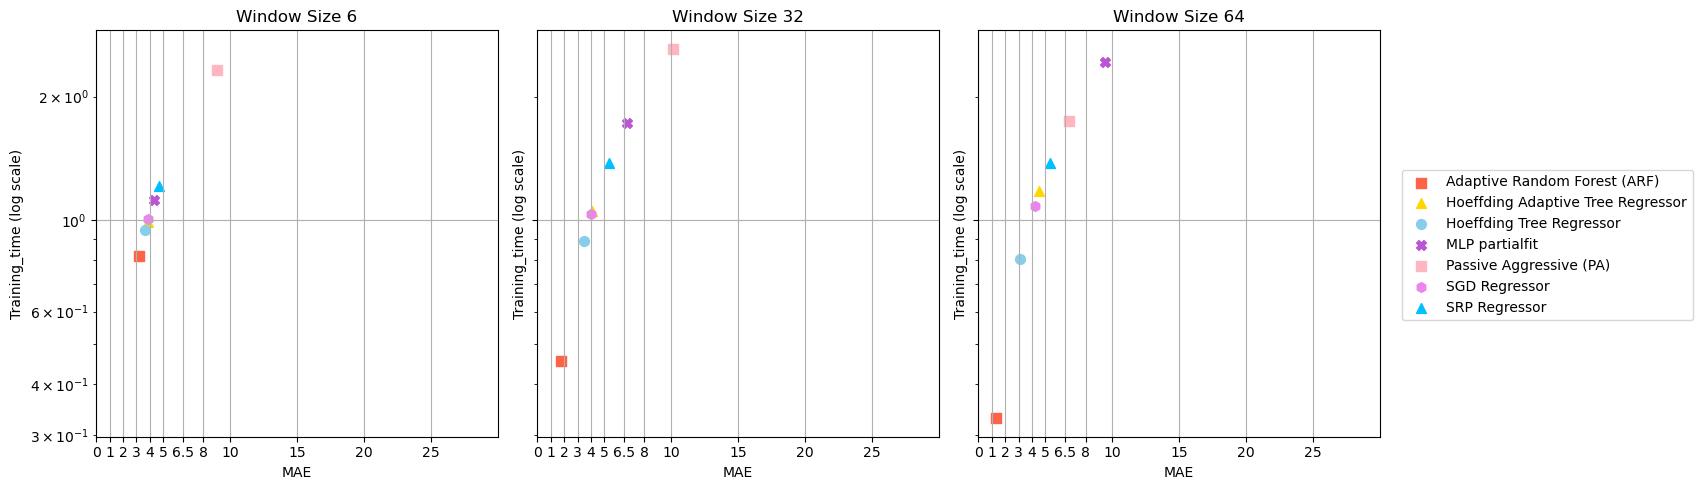

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.legend_handler import HandlerBase

def plot_and_save(df_local, column_name,exp_name):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True) 

    plt.subplots_adjust(hspace=0.5)  

    class MarkerHandler(HandlerBase):
        def create_artists(self, legend, tup, xdescent, ydescent,
                           width, height, fontsize, trans):
            return [tup]

    scatter_handles = {} 

    for i, (col, ax) in enumerate(zip(df_local["Window Size"], axs.flatten())):

        df_temp = df[df['Window Size'] == col].reset_index(drop=True)
        categories = np.random.choice(len(model_info), len(df_temp))
        for index, row in df_temp.iterrows():
            model_info_entry = model_info[row['Model']]
            color = model_info_entry['color']
            marker = model_info_entry['marker']

            handle = ax.scatter(row['MAE_mean'], row[column_name], color=color, marker=marker, label=row['Model'], s=50)
            if i == 0:
                scatter_handles[row['Model']] = handle

        ax.set_title(f"Window Size {col}") 
        ax.set_yscale('log') 
        ax.set_xlabel('MAE')
        ax.set_ylabel(f'{column_name} (log scale)')

        x = [0, 1, 2, 3, 4, 5, 6.5, 8, 10, 15, 20, 25]
        ax.set_xticks(x)
        ax.set_xticklabels(x)
        ax.set_xlim([0, 30])
        ax.grid(True)  

    plt.subplots_adjust(right=0.85) 

    fig.legend(handles=scatter_handles.values(), labels=scatter_handles.keys(), loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, handler_map={plt.scatter: MarkerHandler()})
    plt.tight_layout()
    
    viz_folder = f"images/"
    os.makedirs(viz_folder, exist_ok=True)
    plt.savefig(f"images/{column_name}_plot_{exp_name}.pdf", bbox_inches='tight', dpi=300)  

plot_and_save(sorted_df, "Training_time", exp_name)

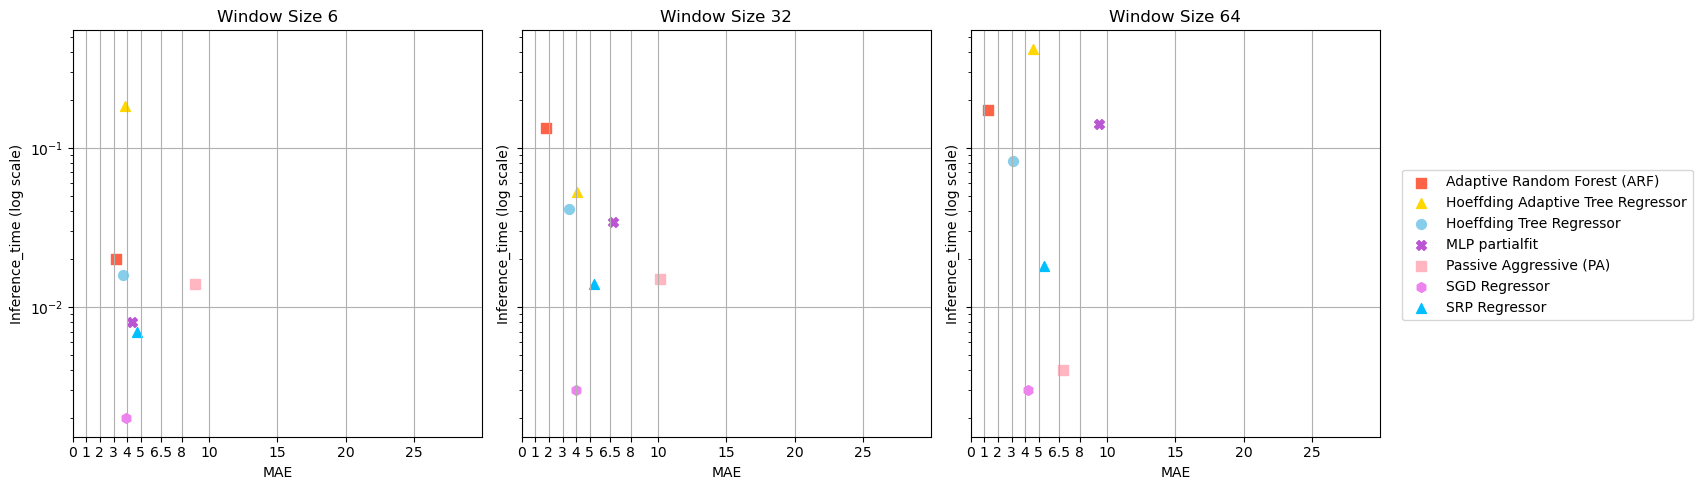

In [36]:
plot_and_save(sorted_df, "Inference_time",exp_name)

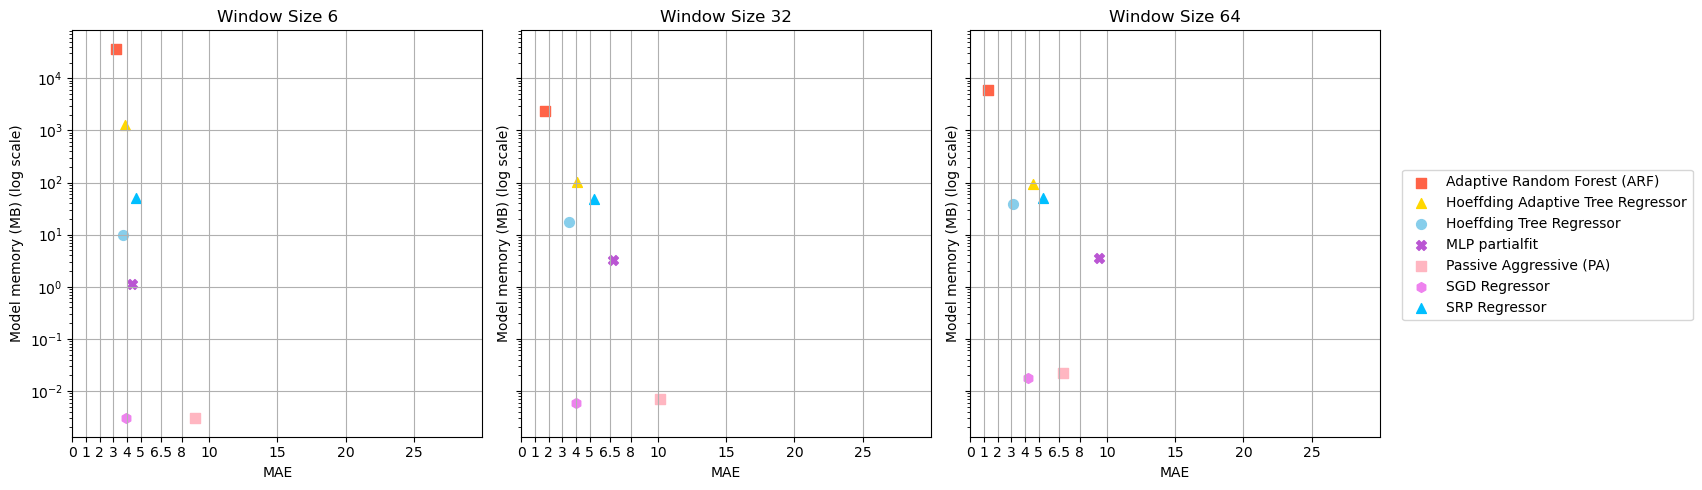

In [37]:
plot_and_save(sorted_df, "Model memory (MB)",exp_name)